In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27.0,31,0.0
1,85.0,64.0,59.0,32.0,23,0.0
2,86.0,54.0,33.0,16.0,54,0.0
3,91.0,78.0,34.0,24.0,36,0.0
4,98.0,55.0,13.0,17.0,17,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22.0,35,4.0
341,89.0,48.0,32.0,22.0,14,4.0
342,85.0,52.0,22.0,23.0,34,4.0
343,95.0,93.0,21.0,27.0,47,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
float64		column 2	3
float64		column 3	3
float64		column 4	3
int64		column 5	0
float64		column 6	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,342.000000,342.000000,342.000000,342.000000,345.000000,339.000000
mean,90.181287,69.871345,30.263158,24.710526,38.284058,3.442478
std,4.434191,18.179807,19.463351,10.078336,39.254616,3.359447
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,92.750000,80.000000,34.000000,27.000000,46.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

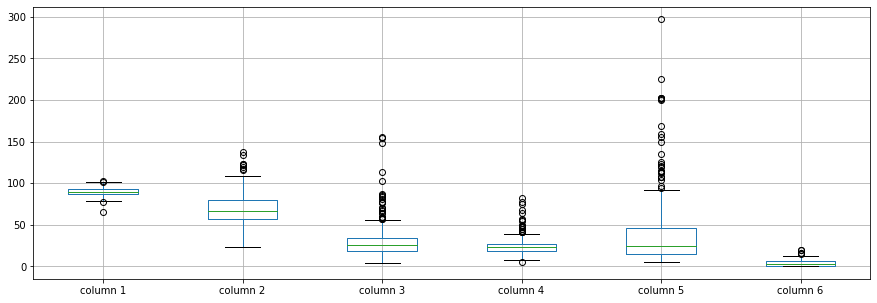

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:

df.mean()

column 1    90.181287
column 2    69.871345
column 3    30.263158
column 4    24.710526
column 5    38.284058
column 6     3.442478
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.038326,0.141782,0.192587,0.219945,0.321006
column 2,0.038326,1.000000,0.079374,0.140594,0.139743,0.105640
column 3,0.141782,0.079374,1.000000,0.737242,0.507340,0.211446
column 4,0.192587,0.140594,0.737242,1.000000,0.525435,0.278356
column 5,0.219945,0.139743,0.507340,0.525435,1.000000,0.351286
column 6,0.321006,0.105640,0.211446,0.278356,0.351286,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+32,6+32+32,6+32+32+32,6+32+32+32+32,6+32+32+32,6+32+32,6+32,6], vae_layer = False, seed = 320)
imputer.build_model(df)
imputer.train_model(training_epochs=32)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 277.34205118815106
Epoch: 1 , loss: 278.0636146182106
Epoch: 2 , loss: 279.63001796177457
Epoch: 3 , loss: 277.5825631277902
Epoch: 4 , loss: 278.4728807721819
Epoch: 5 , loss: 280.2421250116257
Epoch: 6 , loss: 278.7053702218192
Epoch: 7 , loss: 278.86368088495163
Epoch: 8 , loss: 278.3031950451079
Epoch: 9 , loss: 278.97099231538317
Epoch: 10 , loss: 279.1571212041946
Epoch: 11 , loss: 280.1016387939453
Epoch: 12 , loss: 278.01161411830356
Epoch: 13 , loss: 279.01800609770277
Epoch: 14 , loss: 277.25987461635043
Epoch: 15 , loss: 278.16263616652714
Epoch: 16 , loss: 280.007568359375
Epoch: 17 , loss: 277.0995839436849
Epoch: 18 , loss: 278.91011628650483
Epoch: 19 , loss: 279.67959885370163
Epoch: 20 , loss: 279.22217814127606
Epoch: 21 , loss: 279.5049750918434
Epoch: 22 , loss: 277.5669984363374
Epoch: 23 , loss: 278.5551997593471
Epoch: 24 , loss: 277.15745762416293
Epoch: 25 , loss: 279.9032200404

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.0,0.0,0.0,0.0,0,0.0
1,0.0,0.0,0.0,0.0,0,0.0
2,0.0,0.0,0.0,0.0,0,0.0
3,0.0,0.0,0.0,0.0,0,0.0
4,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...
340,0.0,0.0,0.0,0.0,0,0.0
341,0.0,0.0,0.0,0.0,0,0.0
342,0.0,0.0,0.0,0.0,0,0.0
343,0.0,0.0,0.0,0.0,0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

222.00531605601867

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [18]:
NRMS=numerator/denominator
NRMS


0.08810566551729745

In [19]:
new_df.iloc[66,:]

column 1    86.000000
column 2    43.303314
column 3    20.000000
column 4    21.000000
column 5    16.000000
column 6     3.206995
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.000000,92.000000,45.0,27.000000,46.001495,1.780577
1,85.000000,64.000000,59.0,7.505854,23.000000,0.000000
2,86.000000,54.000000,33.0,16.000000,54.000000,0.000000
3,91.000000,78.000000,34.0,24.000000,36.000000,0.000000
4,13.155888,55.000000,13.0,17.000000,17.000000,0.000000
...,...,...,...,...,...,...
340,91.000000,54.000000,25.0,22.000000,35.000000,4.000000
341,89.000000,48.000000,32.0,22.000000,14.000000,4.000000
342,41.770744,52.000000,22.0,23.000000,34.000000,4.000000
343,95.000000,42.953094,21.0,27.000000,47.000000,6.000000


In [24]:
imputations[-1].to_excel("Bupa_NW_1(imp).xlsx", index=False, header=False)